In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [119]:
df = pd.read_csv('input/ambient_temperature_system_failure.csv')

In [120]:
df.describe()


,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [121]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2013-07-04 00:00:00
2014-05-28 15:00:00


In [122]:
df.dtypes

timestamp     object
value        float64
dtype: object

In [123]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #object to timestamp
df['value'] = (df['value'] - 32)* 5/9 #celsius instead of farenheight

In [124]:
df = df.set_index('timestamp')

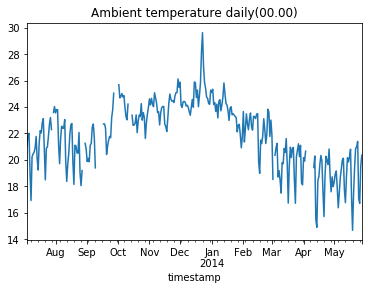

In [125]:
df['value'].asfreq('D').plot()
plt.title("Ambient temperature daily(00.00)")
plt.show()

Shifting and lagging


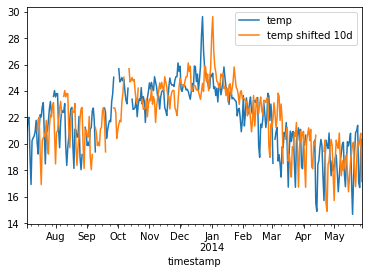

In [126]:
df['value'].asfreq('D').plot(legend = True)
df['value'].asfreq('D').shift(10).plot(legend=True)
plt.legend(['temp', 'temp shifted 10d'])

Rolling windows --> smoothing

In [127]:
#rolling_value = df['value'].rolling('1D').mean()

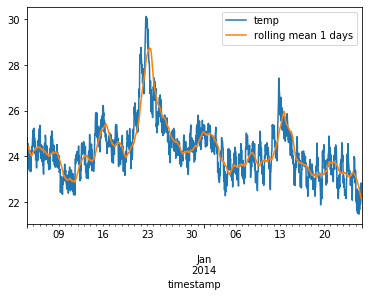

In [128]:
df_sub = df['2013-12-04':'2014-01-25']
rolling_value = df_sub['value'].rolling('1D').mean()
df_sub['value'].plot(legend = True)
rolling_value.plot(legend = True)
plt.legend(['temp', 'rolling mean 1 days'])

Is the TS stationary? Augumented Dickey-Fuller test. Non stationary is p-value >0.05

In [129]:
adf = adfuller(df['value'])
print("p-value: %f " % adf[1])

p-value: 0.000002 


Note that weekly seasonality is shown

Auto corrleation function

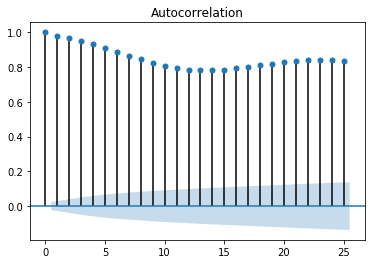

In [130]:
plot_acf(df['value'], lags = 25)
plt.show()

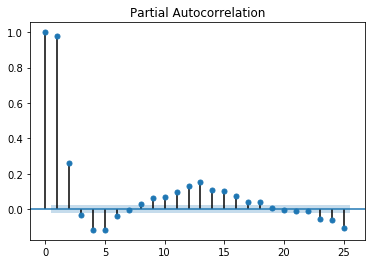

In [131]:
plot_pacf(df['value'], lags = 25)
plt.show()

Decomposition of TS

In [157]:
mult = seasonal_decompose(df_sub['value'], model='additative', freq = 30)

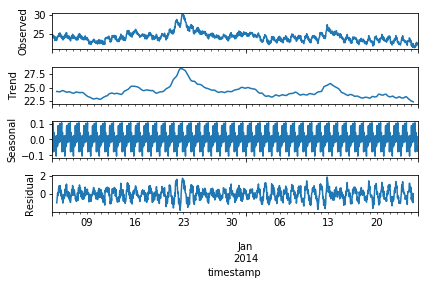

In [158]:
mult.plot()
plt.show()

Differentiate the series



In [139]:
def difference(data, interval = 1):
    diff_list = []
    for i in range(interval, len(data)):
        diff = data[i] - data[i - interval]
        diff_list.append(diff)
    return pd.Series(diff_list)

In [143]:
diff_series = difference(df_sub['value'])

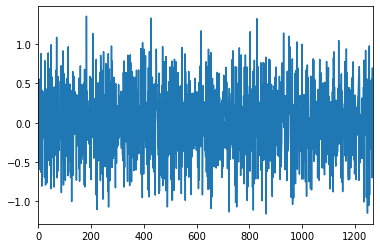

In [144]:
diff_series.plot()
plt.show()

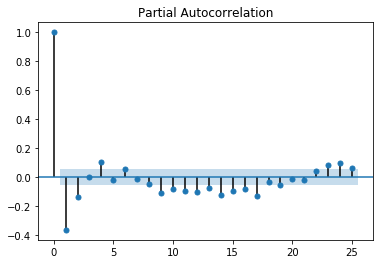

In [149]:
plot_pacf(diff_series, lags = 25)
plt.show()

Automatic differentiating

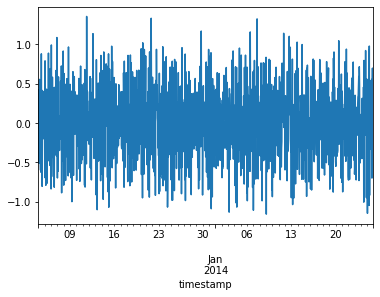

In [152]:
diff = df_sub['value'].diff()
diff.plot()
plt.show()